In [2]:
import pandas as pd
import matplotlib as mb
from matplotlib import style
import numpy as np
style.use('ggplot')
web_data={'Day':[1,2,3,4],
	      'Visitors':[43,44,35,67],
	      'Bounce_Rate':[65,74,75,14]}
df=pd.DataFrame(web_data)
print(df)
#print first 5
print(df.head())
#print last 5
#print(df.tail())
#print last 2
#print(df.tail(2))
#change the head to the col1
#print(df.set_index('col_name')) will give new reference if you don't store it your fault
#df=df.set_index('Day')
#or
#print(df.set_index('Day',inplace=True))
#print(df.tail(2))
#shake it like dictionary
#print(df['Bounce_Rate'])
#print(df.Bounce_Rate)
#multiple col values as list
new_df=df[['Visitors','Bounce_Rate']]
#print(new_df.head())
#print(np.array(df[['Visitors','Bounce_Rate']]))



   Bounce_Rate  Day  Visitors
0           65    1        43
1           74    2        44
2           75    3        35
3           14    4        67
   Bounce_Rate  Day  Visitors
0           65    1        43
1           74    2        44
2           75    3        35
3           14    4        67


In [3]:
data_df=pd.read_csv('/home/anurag/Downloads/Data/ZILL-Z77008_3B.csv')
data_df.set_index('Date',inplace=True)
#print(data_df.head())
data_df.to_csv('/home/anurag/Downloads/Data/pandas_test.csv')
#to change the header of the file while importing
#do not do this fucks your data realbad
data_df=pd.read_csv('/home/anurag/Downloads/Data/pandas_test.csv',index_col=0)
#rename the col
#index is not a column & this sets all the columns 
data_df.columns=['Austin_HPI']
#legit way
data_df.rename(columns={'Austin_HPI':'77008'},inplace=True)
#to remove the header from the list or disable it all together
#data_df.to_csv('/home/anurag/Downloads/Data/pandas_test.csv',header=False)
#to read a file without header
#df=read_csv('filename',names=['Dates','Austin'],index_col=0)
print(data_df.head())
#converting them into other data format
data_df.to_json('/home/anurag/Downloads/Data/wow.json')
data_df.to_html('/home/anurag/Downloads/Data/wow.html')

               77008
Date                
2016-09-30  381700.0
2016-08-31  387500.0
2016-07-31  390000.0
2016-06-30  394600.0
2016-05-31  402400.0


In [33]:
import quandl as qd
import html5lib
import pickle
api_key='76soWLbTjJ23x1naENDY'
df=qd.get('FMAC/HPI_AK',authtoken=api_key)
#print(df.head())
#this is a list
#print(fiddy_state.head())
#this is a dataframe
#print(fiddy_state[0])
#this is a column/list
#print("states"+str(state))
def state_list():
    fiddy_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
def grab_intial_data():
    states_list=state_list()
    main_df=pd.DataFrame()
    for state in states_list:
        query="FMAC/HPI_"+str(state)
        df=qd.get(query,authtoken=api_key)
        #df=df.pct_change()
        df.rename(columns={'Value':str(state)},inplace=True)
        df[state]=(df[state]-df[state][0])/df[state][0]*100
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df)
        pickle_out=open('/home/anurag/Downloads/Data/main_df.pickle','wb')
        pickle.dump(main_df,pickle_out)
        pickle_out.close()
def hpi_benchmark():
    df=pd.DataFrame()
    df=qd.get('FMAC/HPI_USA',authtoken=api_key)
    df.rename(columns={'Value':str('United States')},inplace=True)
    df['United States']=(df['United States']-df['United States'][0])/df['United States'][0]*100
    return df
#grab_intial_data()


In [27]:
pickle_in=open('/home/anurag/Downloads/Data/main_df.pickle','rb')
HPI_data=pickle.load(pickle_in)
#print(HPI_data)
#pandas pickle is relatively fast
HPI_data.to_pickle('/home/anurag/Downloads/Data/pandas_ka_pickle.pickle')
new_data=pd.read_pickle('/home/anurag/Downloads/Data/main_df.pickle')
print(new_data.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.628933  1.481135  1.775578  0.848253  0.352137  1.160075   
1975-03-31  1.363531  2.996464  3.437191  1.588216  1.578298  2.303064   
1975-04-30  2.261745  4.576212  4.707078  2.196974  3.581731  3.360907   
1975-05-31  3.115526  6.298360  5.335401  2.808347  5.252210  4.223948   

                  CT        DE         FL        GA    ...           SD  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.160613  0.089288   3.783323 -0.970722    ...    -1.095463   
1975-03-31  3.783125  0.282646   9.475745 -1.403272    ...    -2.210706   
1975-04-30  4.674912  0.737982  16.517958 -1.218163    ...    -3.319466   
1975-05-31  4.914211  1.558554 

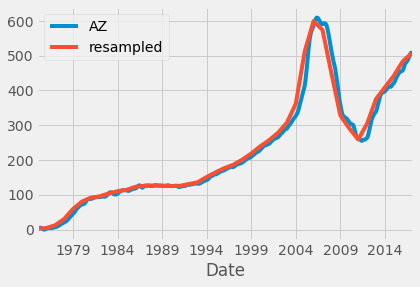

In [53]:
#utilizing the correlation functions and features of Pandas
#new_data['TX2']=new_data['TX']*2
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
us_df=hpi_benchmark()
new_data['AZ'].plot(ax=ax1)
#us_df.plot(ax=ax1,color='k',linewidth=10)
resampled_mean=new_data['AZ'].resample('A').mean()
resampled_mean.plot(ax=ax1,label='resampled')
plt.legend(loc=2)
plt.show()


In [47]:
new_data_corr=new_data.corr()
#print(new_data_corr.head())
#describes the corre
#print(new_data_corr.describe())
#sampling bascially filters the data
#increase granularity no no
#clusters based on the column values and finds mean/sum/high-low/
#refer to the alias for the pandas for year(A,M,D)
resampled_mean=new_data['AZ'].resample('A').mean()
resampled_mean.plot(ax=ax1,label='resampled')


In [3]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])
